**ANN**

train_images shape:  (60000, 28, 28)
train_labels shape:  (60000,)
test_images shape:  (10000, 28, 28)
test_labels shape:  (10000,)


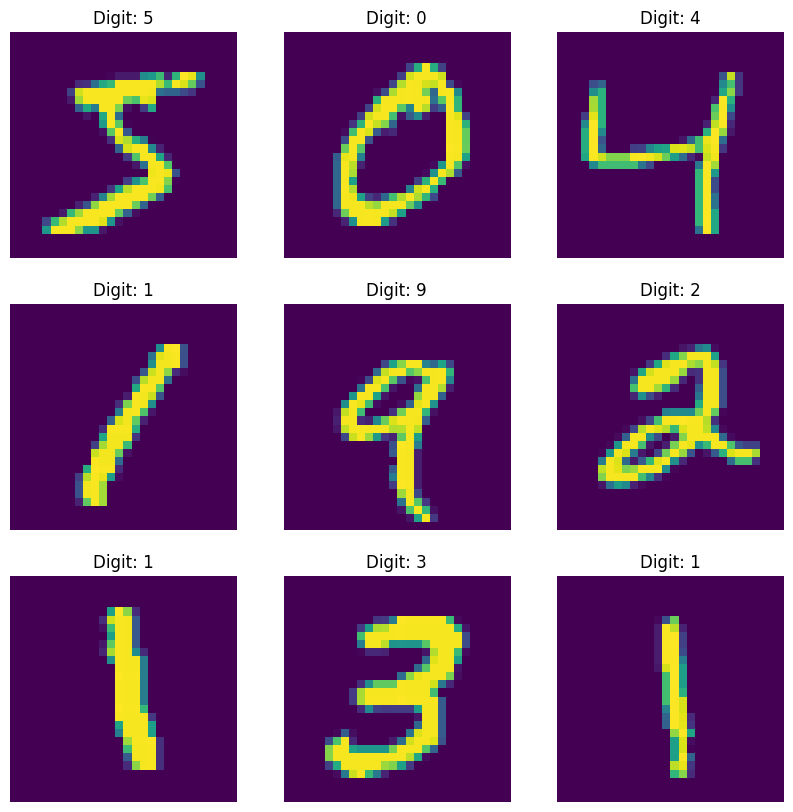

First Label before conversion:
5
First Label after conversion:
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Epoch 1/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1988 - accuracy: 0.9417
Epoch 2/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0792 - accuracy: 0.9755
Epoch 3/3
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0529 - accuracy: 0.9832


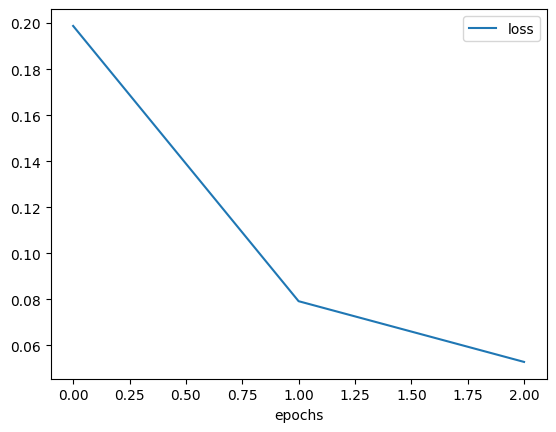

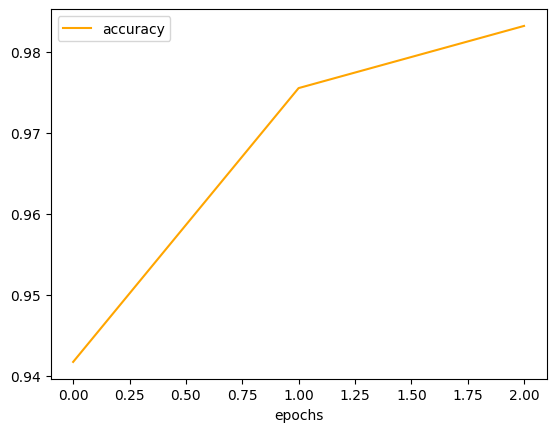

313/313 [==============================] - 2s 6ms/step - loss: 0.0832 - accuracy: 0.9745
Test Loss: 0.0832
Test Accuracy: 0.9745
313/313 [==============================] - 2s 7ms/step
Probabilities predicted for image at index 11
[5.2732939e-05 9.6448119e-08 2.1853150e-06 1.3676285e-07 1.6679989e-05
 5.3925116e-05 9.9986458e-01 1.3609131e-06 8.3925142e-06 9.6096251e-09]

Probabilities class for image at index 11
6


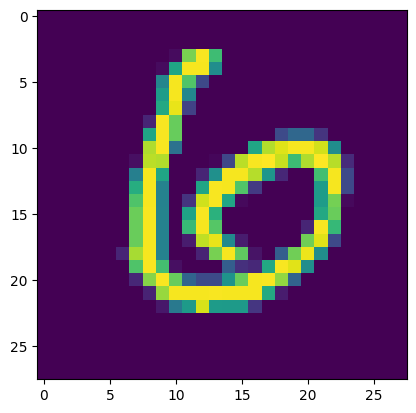

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

# Printing the shapes
print("train_images shape: ", train_images.shape)
print("train_labels shape: ", train_labels.shape)
print("test_images shape: ", test_images.shape)
print("test_labels shape: ", test_labels.shape)

# Displaying first 9 images of dataset
fig = plt.figure(figsize=(10,10))

nrows=3
ncols=3
for i in range(9):
  fig.add_subplot(nrows, ncols, i+1)
  plt.imshow(train_images[i])
  plt.title("Digit: {}".format(train_labels[i]))
  plt.axis(False)
plt.show()


# Converting image pixel values to 0 - 1
train_images = train_images / 255
test_images = test_images / 255

print("First Label before conversion:")
print(train_labels[0])

# Converting labels to one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

print("First Label after conversion:")
print(train_labels[0])


# Defining Model
# Using Sequential() to build layers one after another
model = tf.keras.Sequential([

  # Flatten Layer that converts images to 1D array
  tf.keras.layers.Flatten(),

  # Hidden Layer with 512 units and relu activation
  tf.keras.layers.Dense(units=512, activation='relu'),

  # Output Layer with 10 units for 10 classes and softmax activation
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(
  loss = 'categorical_crossentropy',
  optimizer = 'adam',
  metrics = ['accuracy']
)
 #Training a neural network
history = model.fit(
  x = train_images,
  y = train_labels,
  epochs = 3
)


# Showing plot for loss
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.legend(['loss'])
plt.show()

# Showing plot for accuracy
plt.plot(history.history['accuracy'], color='orange')
plt.xlabel('epochs')
plt.legend(['accuracy'])
plt.show()


# Call evaluate to find the accuracy on test images
test_loss, test_accuracy = model.evaluate(
  x = test_images,
  y = test_labels
)

print("Test Loss: %.4f"%test_loss)
print("Test Accuracy: %.4f"%test_accuracy)

# Making Predictions
predicted_probabilities = model.predict(test_images)
predicted_classes = tf.argmax(predicted_probabilities, axis=-1).numpy()

index=11

# Showing image
plt.imshow(test_images[index])

# Printing Probabilities
print("Probabilities predicted for image at index", index)
print(predicted_probabilities[index])

print()

# Printing Predicted Class
print("Probabilities class for image at index", index)
print(predicted_classes[index])